# telecom_customer_churn


In [1]:
#loading required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading dataset
df=pd.read_csv("telecom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Dataset Description:
Number of columns: 23


1. Date  - The date of observation
2. Location  -The common name of the location of the weather station
3. MinTemp  -The minimum temperature in degrees celsius
4. MaxTemp -The maximum temperature in degrees celsius
5. Rainfall  -The amount of rainfall recorded for the day in mm
6. Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
7. Sunshine  -The number of hours of bright sunshine in the day.
8. WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
9. WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
10. WindDir9am -Direction of the wind at 9am
11. WindDir3pm -Direction of the wind at 3pm
12. WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
13. WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
14. Humidity9am -Humidity (percent) at 9am
15. Humidity3pm -Humidity (percent) at 3pm
16. Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
17. Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
18. Cloud9am - Fraction of sky obscured by cloud at 9am. 
19. Cloud3pm -Fraction of sky obscured by cloud 
20. Temp9am-Temperature (degrees C) at 9am
21. Temp3pm -Temperature (degrees C) at 3pm
22. RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
23. RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".


In [4]:
# checking shape of dataset
df.shape

(7043, 21)

In this dataset we have 7043 row and 21 columns

In [136]:
#checking head of dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [137]:
#checking tail of dataset
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [138]:
#checking sample of dataset
df.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6538,5712-PTIWW,Male,0,No,No,2,Yes,No,Fiber optic,No,...,Yes,Yes,No,No,Month-to-month,Yes,Electronic check,79.85,152.45,Yes


In [139]:
#checking columns of dataset
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [140]:
#checking datatype of dataset
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [141]:
#checking information of datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In this dataset
1. float - 1 column
2. integer- 2 column 
3. object - 18 columnns are present

In [142]:
# checking for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

no null value is present in dataset

<AxesSubplot:>

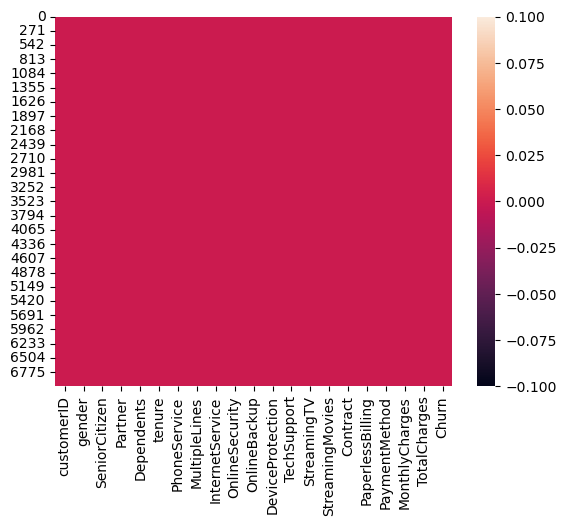

In [143]:
#visualization of null values
sns.heatmap(df.isnull())

No null values are present here

In [144]:
# checking for white space
# Iterate through each column of the dataframe and check for white spaces
for col in df.columns:
    # Count the number of white spaces in the column
    num_spaces = sum(df[col].astype(str).apply(lambda x: x.isspace()))

    # Display the results
    print(f"Column '{col}' has {num_spaces} white spaces.")


Column 'customerID' has 0 white spaces.
Column 'gender' has 0 white spaces.
Column 'SeniorCitizen' has 0 white spaces.
Column 'Partner' has 0 white spaces.
Column 'Dependents' has 0 white spaces.
Column 'tenure' has 0 white spaces.
Column 'PhoneService' has 0 white spaces.
Column 'MultipleLines' has 0 white spaces.
Column 'InternetService' has 0 white spaces.
Column 'OnlineSecurity' has 0 white spaces.
Column 'OnlineBackup' has 0 white spaces.
Column 'DeviceProtection' has 0 white spaces.
Column 'TechSupport' has 0 white spaces.
Column 'StreamingTV' has 0 white spaces.
Column 'StreamingMovies' has 0 white spaces.
Column 'Contract' has 0 white spaces.
Column 'PaperlessBilling' has 0 white spaces.
Column 'PaymentMethod' has 0 white spaces.
Column 'MonthlyCharges' has 0 white spaces.
Column 'TotalCharges' has 11 white spaces.
Column 'Churn' has 0 white spaces.


only Column 'TotalCharges' has 11 white spaces.

In [5]:
# remove leading and trailing white spaces in the "TotalCharges" column
df['TotalCharges'] = df['TotalCharges'].str.strip()


In [6]:
# check if the "TotalCharges" column contains whitespace characters
contains_whitespace = df['TotalCharges'].str.contains('\s').any()

if contains_whitespace:
    print("The 'TotalCharges' column contains whitespace characters.")
else:
    print("The 'TotalCharges' column does not contain whitespace characters.")

The 'TotalCharges' column does not contain whitespace characters.


whitespace removed successfully

In [147]:
#checking number of unique values of each columns
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [7]:
#checking unique values of target columns
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

# EDA

In [8]:
# splitting the dataset in numerical and categorical dataset
# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [9]:
# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['SeniorCitizen', 'tenure', 'MonthlyCharges']


# Visualization

### univariant analysis for categorical column

Male      3555
Female    3488
Name: gender, dtype: int64


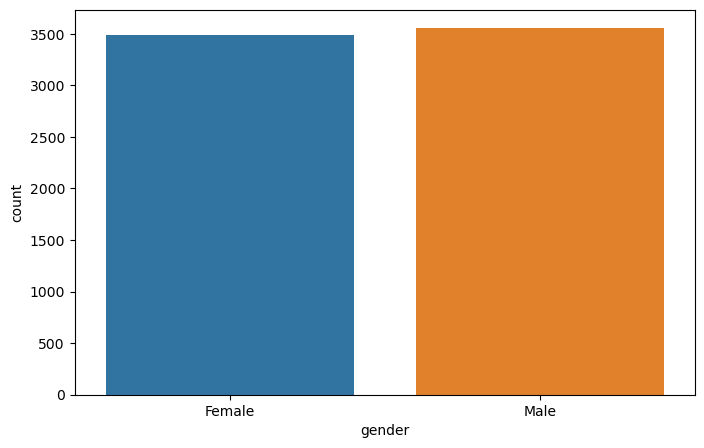

In [151]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x='gender', data=df)
print(df["gender"].value_counts())

Male and female count is almost same

No     3641
Yes    3402
Name: Partner, dtype: int64


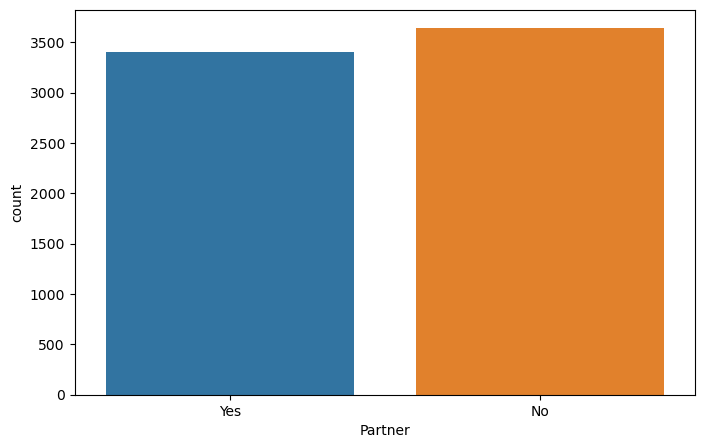

In [152]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x='Partner', data=df)
print(df["Partner"].value_counts())

Customer who doesnt have parter are quite more than who have a parter

No     4933
Yes    2110
Name: Dependents, dtype: int64


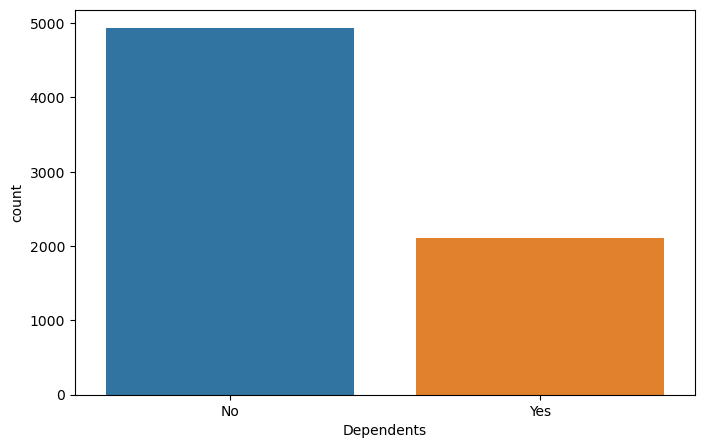

In [153]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x='Dependents', data=df)
print(df["Dependents"].value_counts())

customer who doesnt have dependant are more than who have dependand

Yes    6361
No      682
Name: PhoneService, dtype: int64


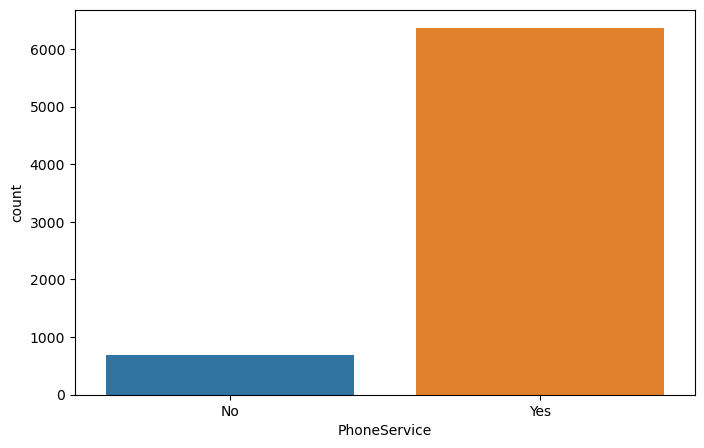

In [154]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x='PhoneService', data=df)
print(df["PhoneService"].value_counts())

customer who have phone service are high than no

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


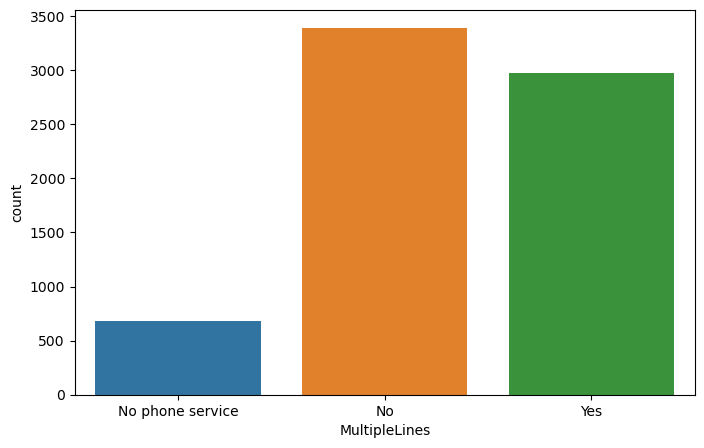

In [155]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x='MultipleLines', data=df)
print(df["MultipleLines"].value_counts())

customers who doesnt have multiple lines are more followed by yes and no phone service

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


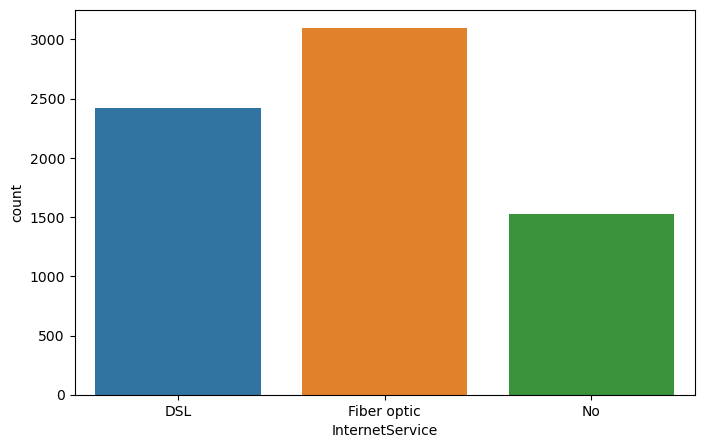

In [156]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x='InternetService', data=df)
print(df["InternetService"].value_counts())

customer who opted for internet service are highly used fiber optic followed by DSL 

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


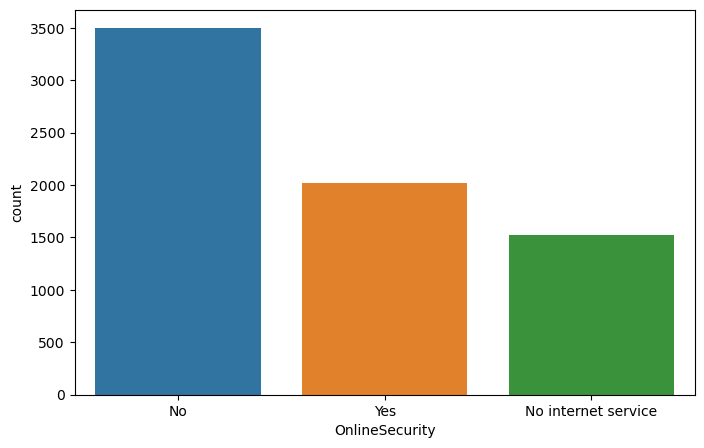

In [157]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x='OnlineSecurity', data=df)
print(df["OnlineSecurity"].value_counts())

customers who doesnt have online security are high followed by having security and no internet service

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


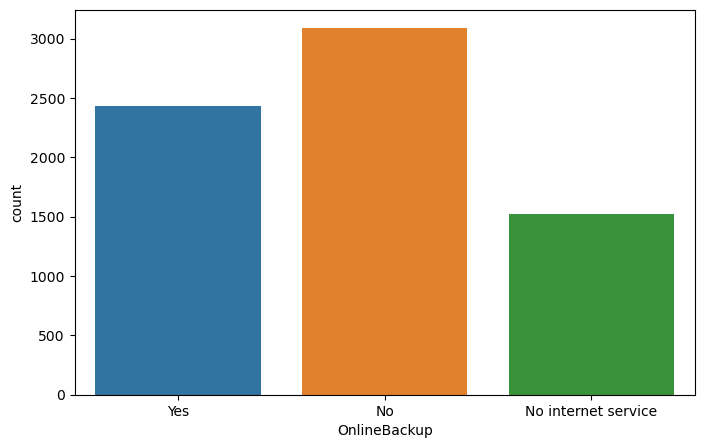

In [158]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x='OnlineBackup', data=df)
print(df["OnlineBackup"].value_counts())

customer who doesnt take online backup are high in number than who take it and then followed by no internet security

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


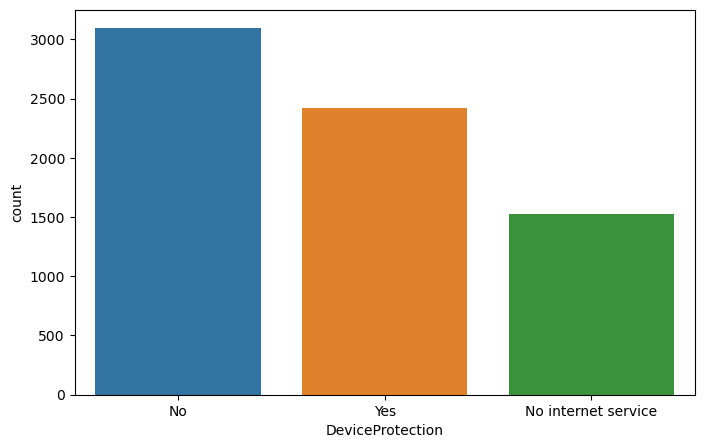

In [159]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x='DeviceProtection', data=df)
print(df["DeviceProtection"].value_counts())

customers who doesnt have DeviceProtection are high followed by having DeviceProtection and no internet service

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


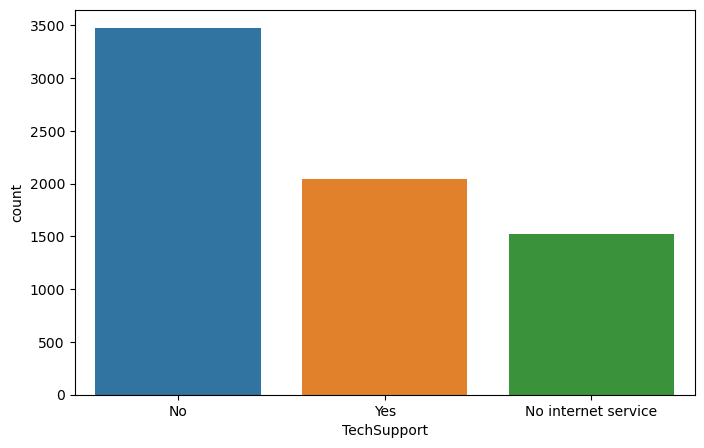

In [160]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x='TechSupport', data=df)
print(df["TechSupport"].value_counts())

customers who doesnt have TechSupport are high followed by having TechSupport and no internet service

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


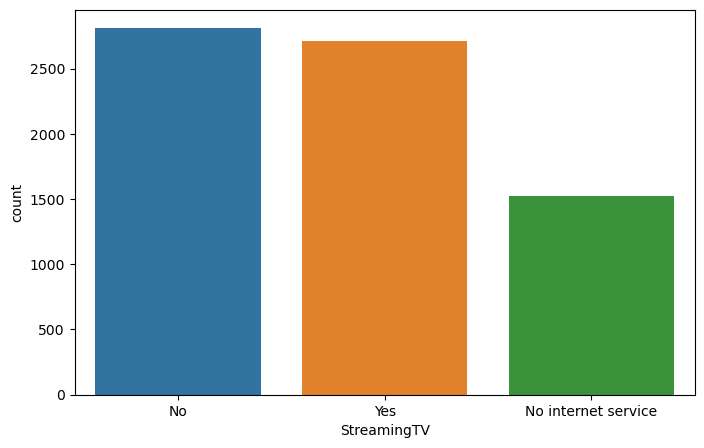

In [161]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x='StreamingTV', data=df)
print(df["StreamingTV"].value_counts())

customers who doesnt have StreamingTV are almost same as who is StreamingTV  followed by no internet service

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


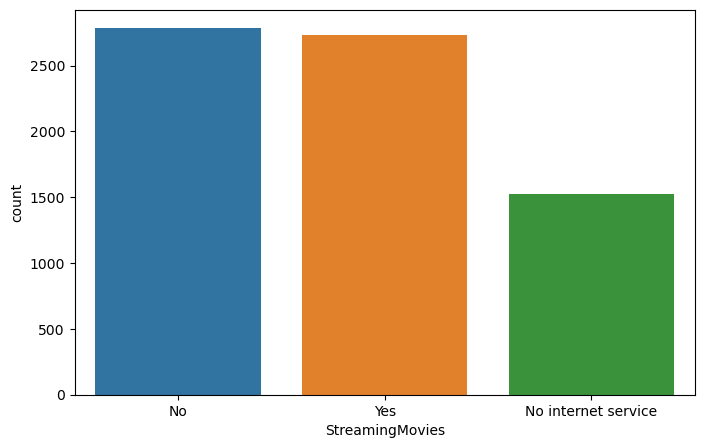

In [162]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x='StreamingMovies', data=df)
print(df["StreamingMovies"].value_counts())

customers who doesnt have StreamingMovies are exactly same as who is StreamingMovies followed by no internet service

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


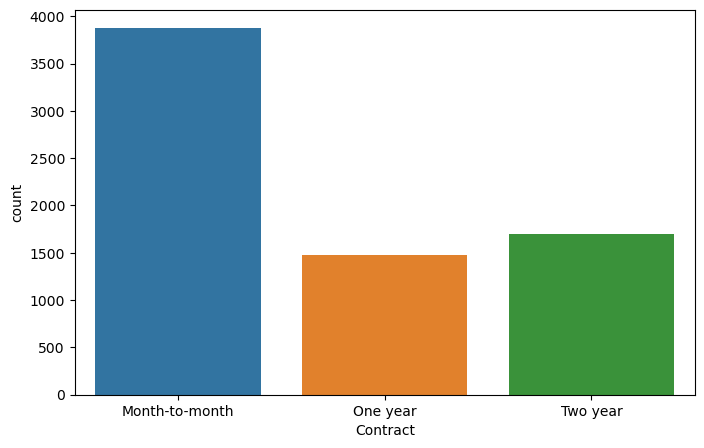

In [163]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x='Contract', data=df)
print(df["Contract"].value_counts())

customers who have month to month are high followed by having one year contract and two year contract

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


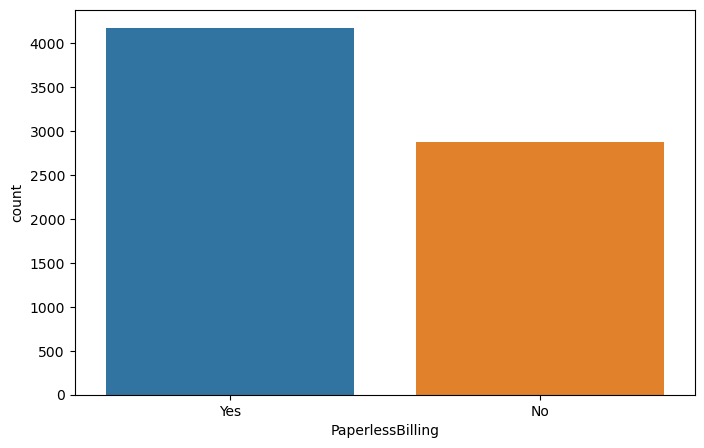

In [164]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x='PaperlessBilling', data=df)
print(df["PaperlessBilling"].value_counts())

count of paperless billing is high 

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


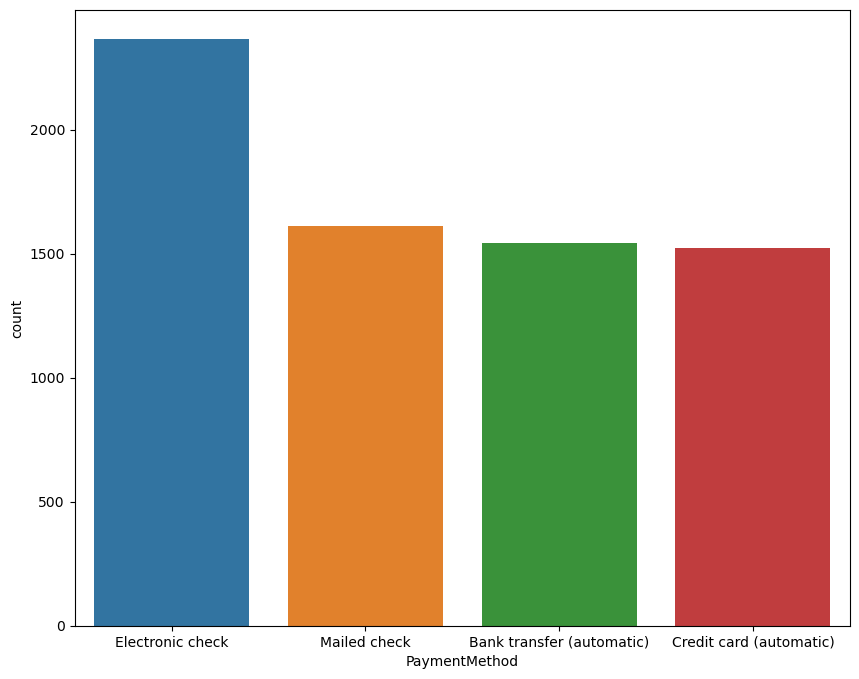

In [165]:
plt.figure(figsize=(10,8))
ax=sns.countplot(x='PaymentMethod', data=df)
print(df["PaymentMethod"].value_counts())

payment method from electronic check is higher than mailed check and then followed by bank transfer and credit card

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64


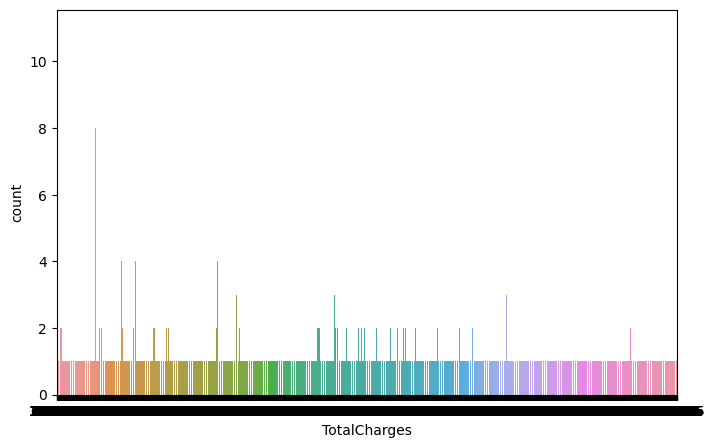

In [166]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x='TotalCharges', data=df)
print(df["TotalCharges"].value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


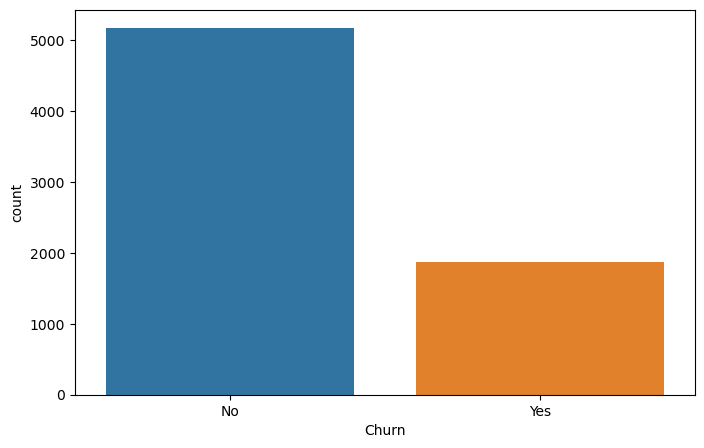

In [167]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x='Churn', data=df)
print(df["Churn"].value_counts())

customer doesnt stop doing business with company)churn) is high 

## univariant analysis for numerical column

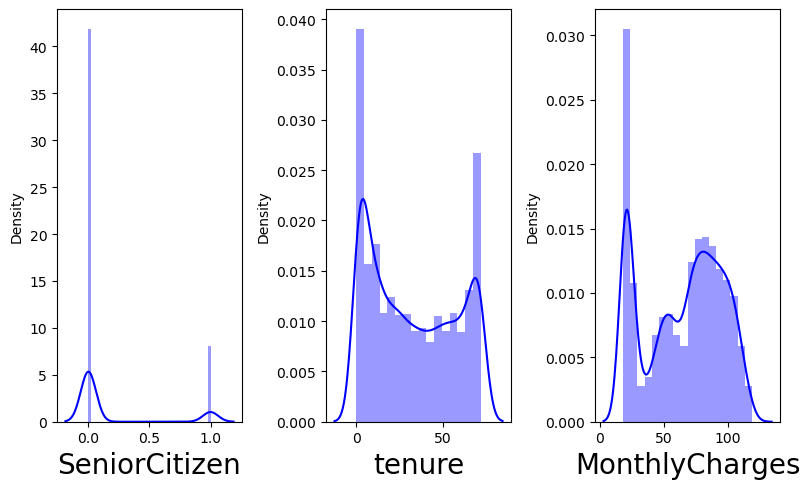

In [168]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(8,5),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=3:
        ax=plt.subplot(1,3,plotnumber)
        sns.distplot(df[column],color="b")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

in all columns of numerical columns, data is not normally distributted

## Bivariant analysis

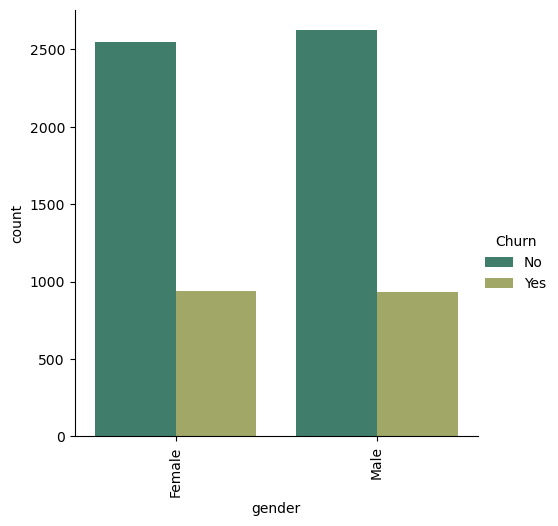

In [4]:
# Comparing gender and Churn
sns.factorplot('gender',kind='count',data=df,hue='Churn',palette="gist_earth")
plt.xticks(rotation=90)
plt.show()

male customers churns equally than female customer

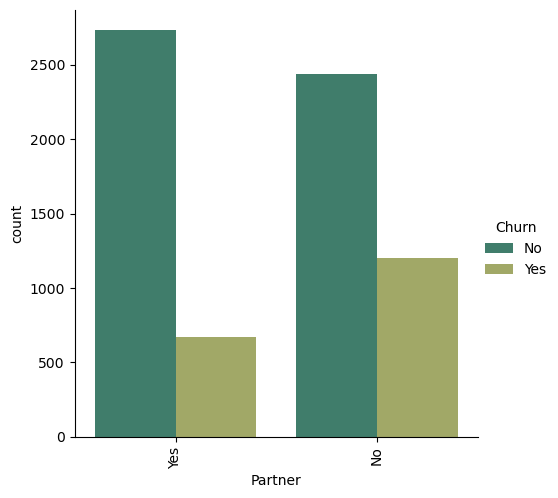

In [5]:
# Comparing Partner and Churn
sns.factorplot('Partner',kind='count',data=df,hue='Churn',palette="gist_earth")
plt.xticks(rotation=90)
plt.show()

customers who have partner churns less

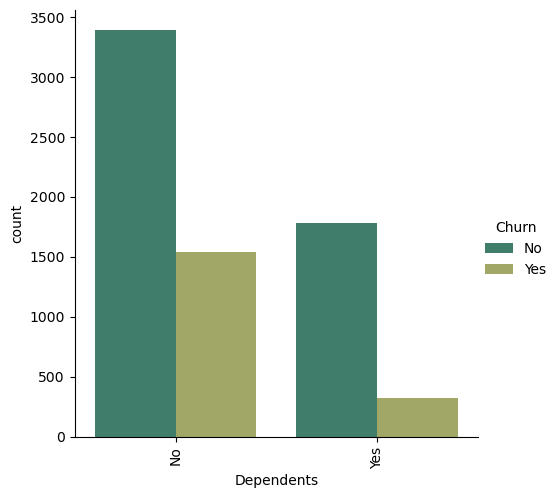

In [6]:
# Comparing Dependents and Churn
sns.factorplot('Dependents',kind='count',data=df,hue='Churn',palette="gist_earth")
plt.xticks(rotation=90)
plt.show()

customers who doesn't have  partner dependants more

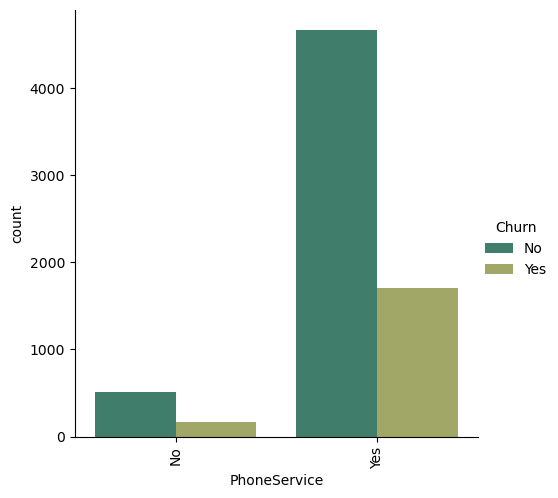

In [7]:
# Comparing PhoneService and Churn
sns.factorplot('PhoneService',kind='count',data=df,hue='Churn',palette="gist_earth")
plt.xticks(rotation=90)
plt.show()

customers who have phone service doesnt  churns 

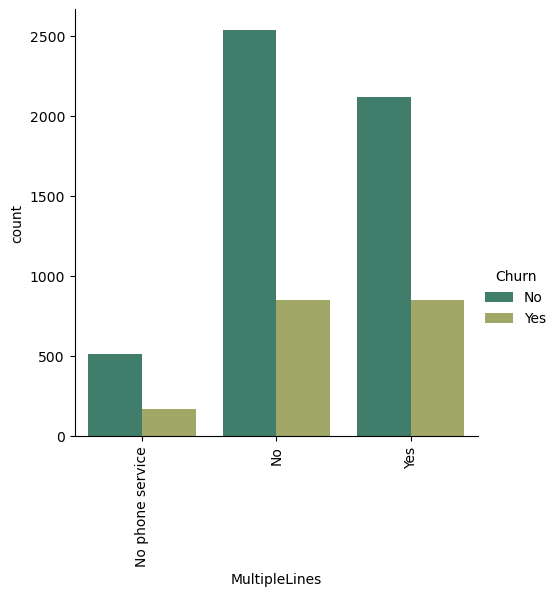

In [8]:
# Comparing MultipleLines and Churn
sns.factorplot('MultipleLines',kind='count',data=df,hue='Churn',palette="gist_earth")
plt.xticks(rotation=90)
plt.show()

customers who have multiple lines and phone service churns less

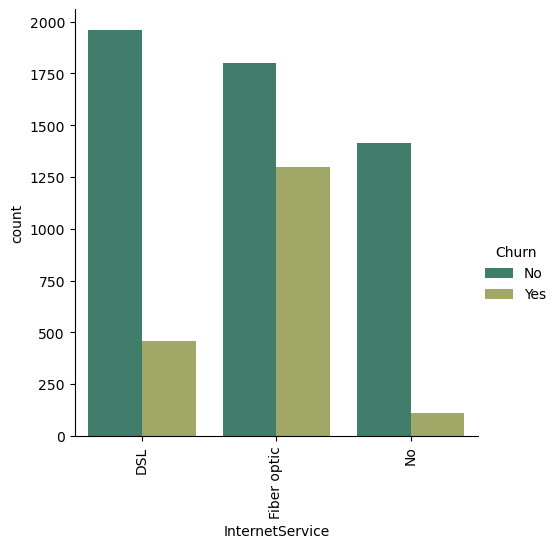

In [9]:
#Checking the relation between InternetService and Churn
sns.factorplot('InternetService',kind='count',data=df,hue='Churn',palette="gist_earth")
plt.xticks(rotation=90)
plt.show()

customers who doesnt have internet service churns less

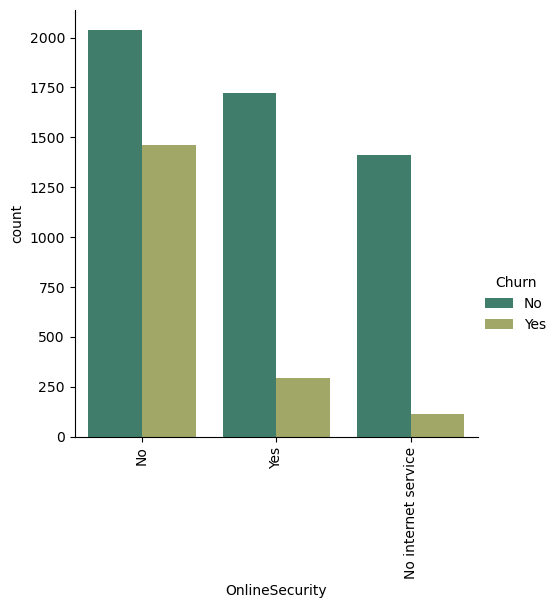

In [10]:
#Checking the relation between OnlineSecurity and Churn
sns.factorplot('OnlineSecurity',kind='count',data=df,hue='Churn',palette="gist_earth")
plt.xticks(rotation=90)
plt.show()

customers who doesnt have internet service churns high

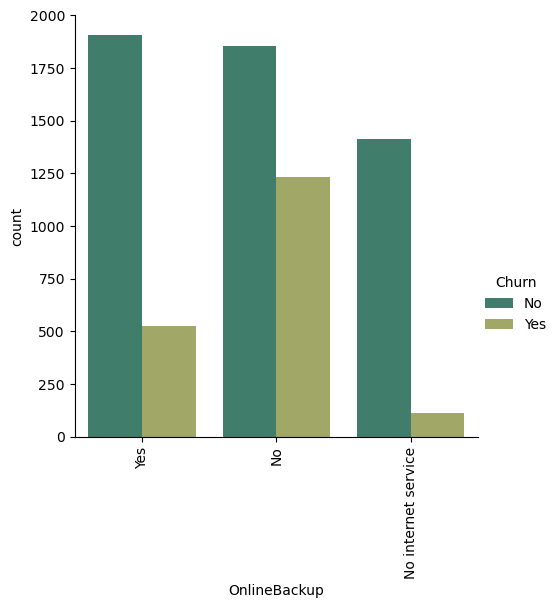

In [11]:
#Checking the relation between OnlineBackup and Churn
sns.factorplot('OnlineBackup',kind='count',data=df,hue='Churn',palette="gist_earth")
plt.xticks(rotation=90)
plt.show()

customers who doesnt have internet service churns high

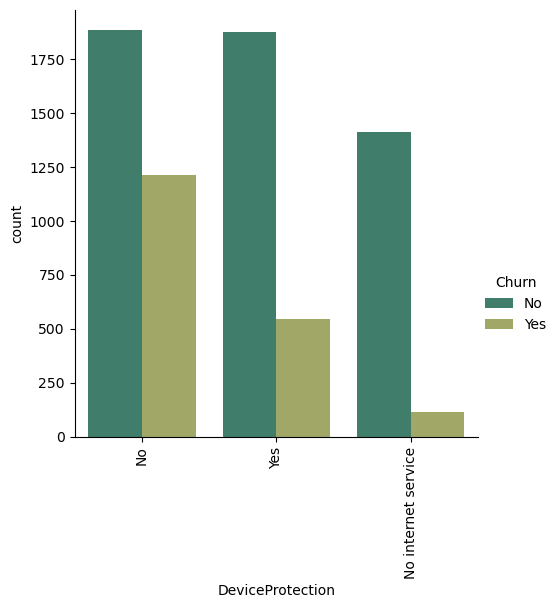

In [12]:
#Checking the relation between DeviceProtection and Churn
sns.factorplot('DeviceProtection',kind='count',data=df,hue='Churn',palette="gist_earth")
plt.xticks(rotation=90)
plt.show()

customers who doesnt have internet service churns less

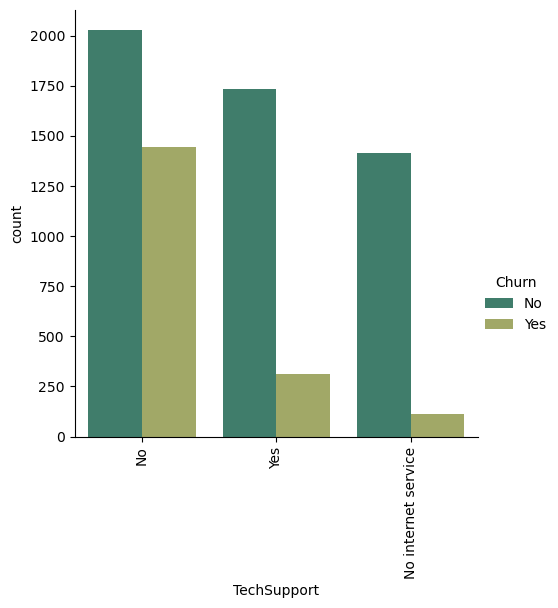

In [13]:
#Checking the relation between TechSupport and Churn
sns.factorplot('TechSupport',kind='count',data=df,hue='Churn',palette="gist_earth")
plt.xticks(rotation=90)
plt.show()

customers who doesnt have internet service churns less

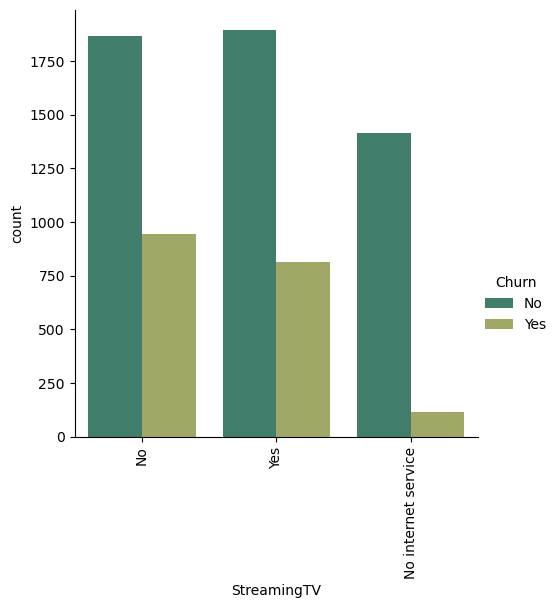

In [14]:
#Checking the relation between StreamingTV and Churn
sns.factorplot('StreamingTV',kind='count',data=df,hue='Churn',palette="gist_earth")
plt.xticks(rotation=90)
plt.show()

customers who doesnt have internet service churns less

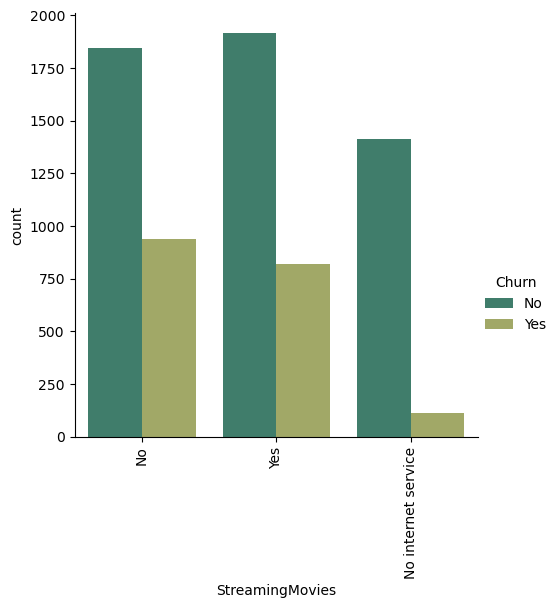

In [15]:
#Checking the relation between StreamingMovies and Churn
sns.factorplot('StreamingMovies',kind='count',data=df,hue='Churn',palette="gist_earth")
plt.xticks(rotation=90)
plt.show()

customers who doesnt have internet service churns less

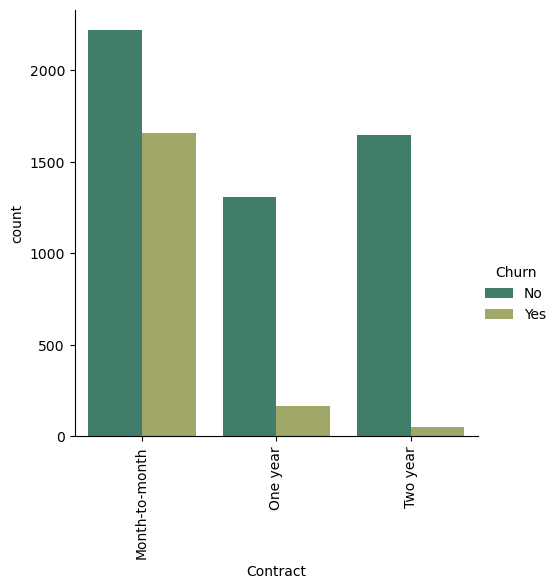

In [16]:
#Checking the relation between Contract and Churn
sns.factorplot('Contract',kind='count',data=df,hue='Churn',palette="gist_earth")
plt.xticks(rotation=90)
plt.show()

customers who have two year contract churns less

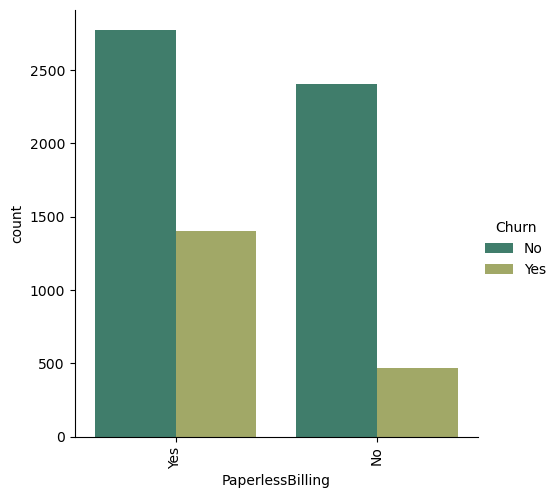

In [17]:
#Checking the relation between PaperlessBilling and Churn
sns.factorplot('PaperlessBilling',kind='count',data=df,hue='Churn',palette="gist_earth")
plt.xticks(rotation=90)
plt.show()

customers who have paperless billing churns high

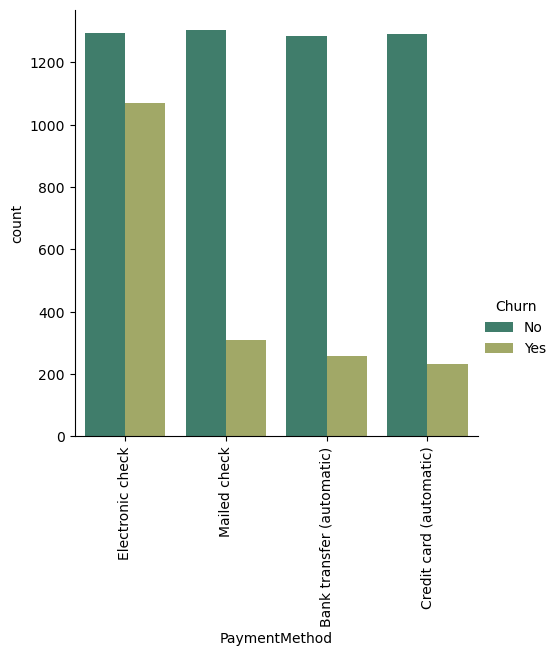

In [18]:
#Checking the relation between PaymentMethod and Churn
sns.factorplot('PaymentMethod',kind='count',data=df,hue='Churn',palette="gist_earth")
plt.xticks(rotation=90)
plt.show()

customers who have electronic check payment churns high

<AxesSubplot:title={'center':'Comparision between SeniorCitizen and Churn'}, xlabel='SeniorCitizen', ylabel='Churn'>

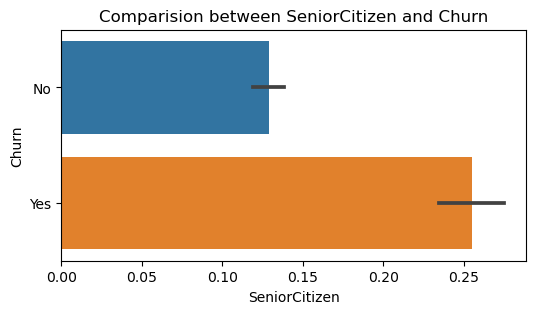

In [184]:
#Checking the relation between SeniorCitizen and Churn
plt.figure(figsize=[6,3])
plt.title('Comparision between SeniorCitizen and Churn')
sns.barplot(x='SeniorCitizen',y="Churn",data=df)

senior citizen churns high

<AxesSubplot:title={'center':'Comparision between MonthlyCharges and Churn'}, xlabel='MonthlyCharges', ylabel='Churn'>

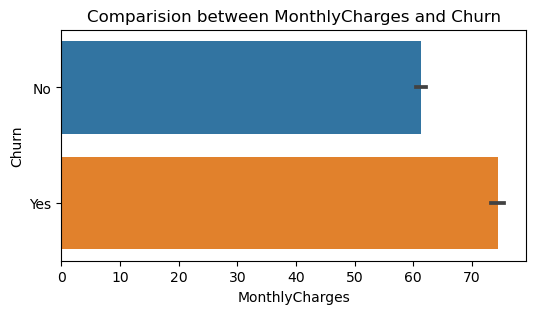

In [185]:
#Checking the relation between MonthlyCharges and Churn
plt.figure(figsize=[6,3])
plt.title('Comparision between MonthlyCharges and Churn')
sns.barplot(x='MonthlyCharges',y="Churn",data=df)

customer who paid monthly charges more churns high

<AxesSubplot:title={'center':'Comparision between tenure and Churn'}, xlabel='tenure', ylabel='Churn'>

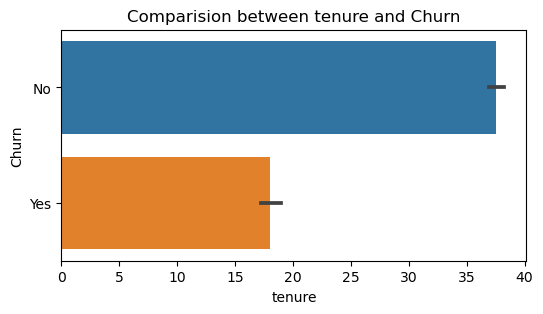

In [186]:
#Checking the relation between tenure and Churn
plt.figure(figsize=[6,3])
plt.title('Comparision between tenure and Churn')
sns.barplot(x='tenure',y="Churn",data=df)

customer who has tenure high more churns high

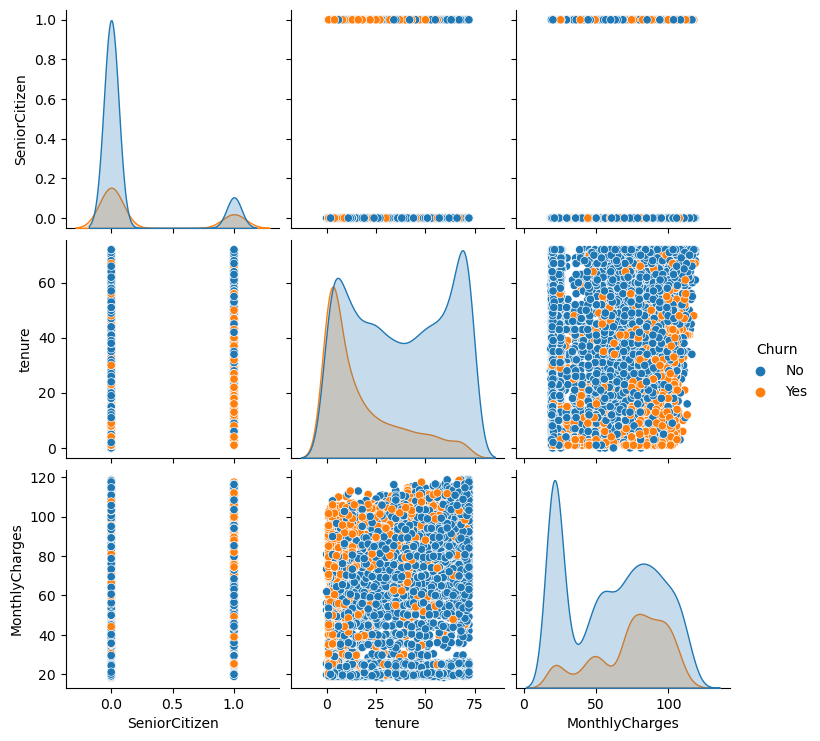

In [187]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="Churn")

## Statistical summary

In [188]:
# statistical summary of numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Observation:
1. count is same for all column
2. for senior citizen and tenure column mean>median, it is right skewed data.
3. for monthly charges median>mean, data is left skewed data.


In [189]:
# statistical summary of categorical columns
df.describe(include=['O'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


<AxesSubplot:>

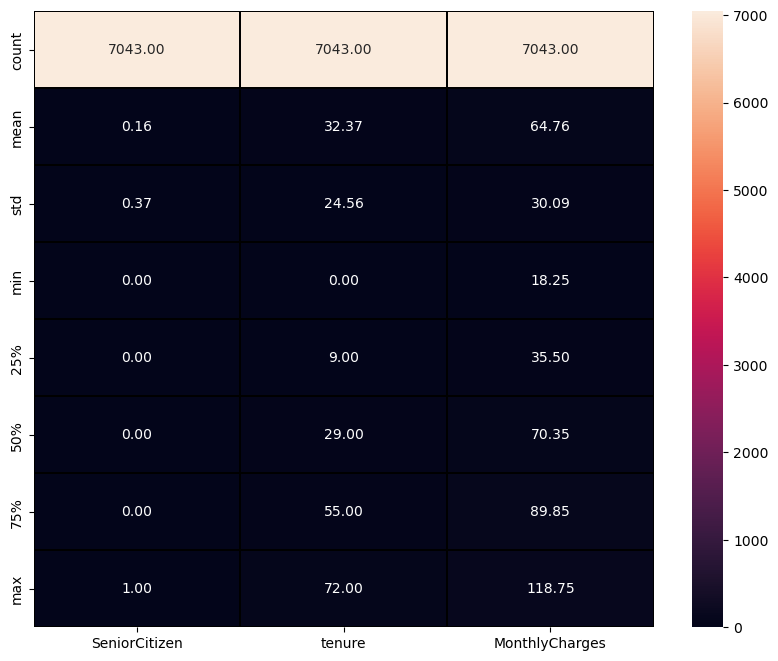

In [190]:
# visualize df.describe
plt.figure(figsize=(10,8))
sns.heatmap(df.describe(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

In [10]:
#dropping irrelevant column
df.drop('customerID',axis=1,inplace=True)

In [192]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [193]:
# again checking shape
df.shape

(7043, 20)

In [11]:
#converting categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['gender', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','TotalCharges', 'Churn']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


In [12]:
#checking unique values for target variable
df["Churn"].unique()

array([0, 1])

<AxesSubplot:>

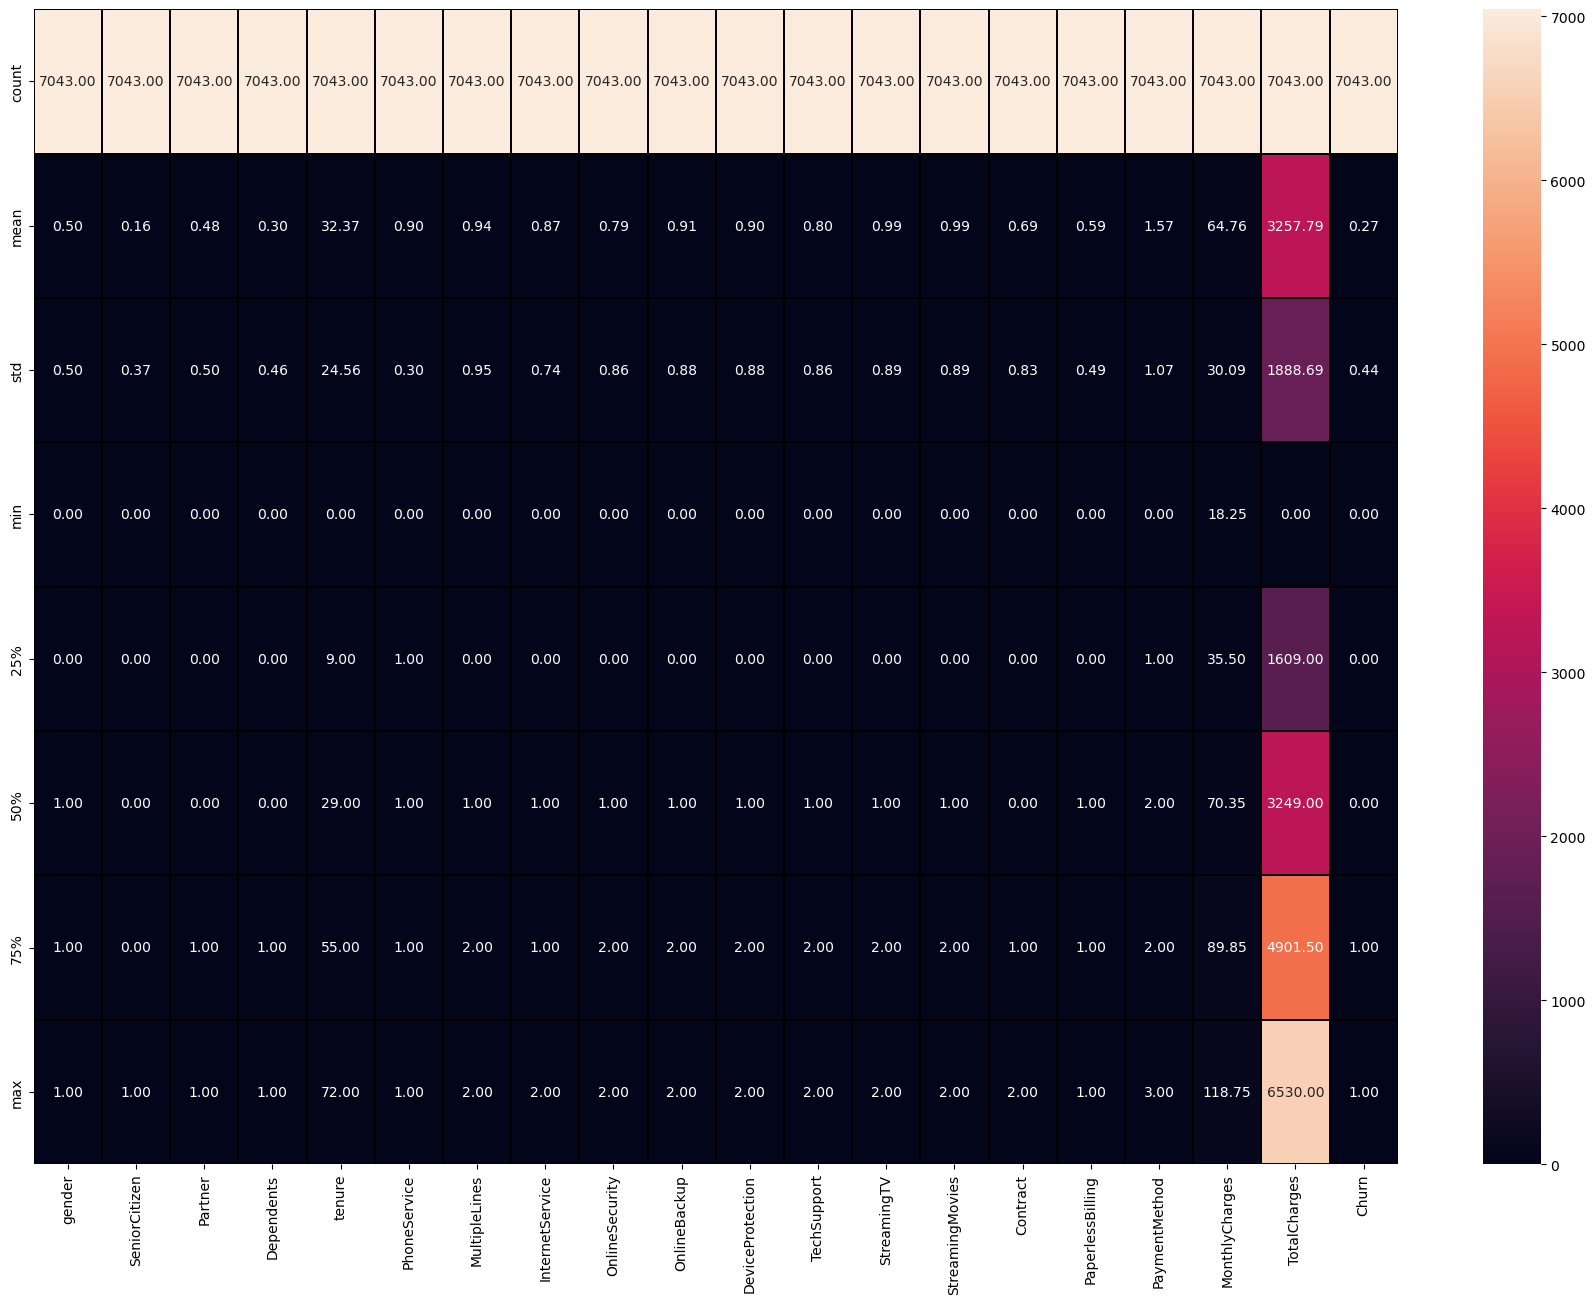

In [195]:
#  again visualize df.describe
plt.figure(figsize=(22,15))
sns.heatmap(df.describe(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

In [196]:
#correlation
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.090756,-0.195525


<AxesSubplot:>

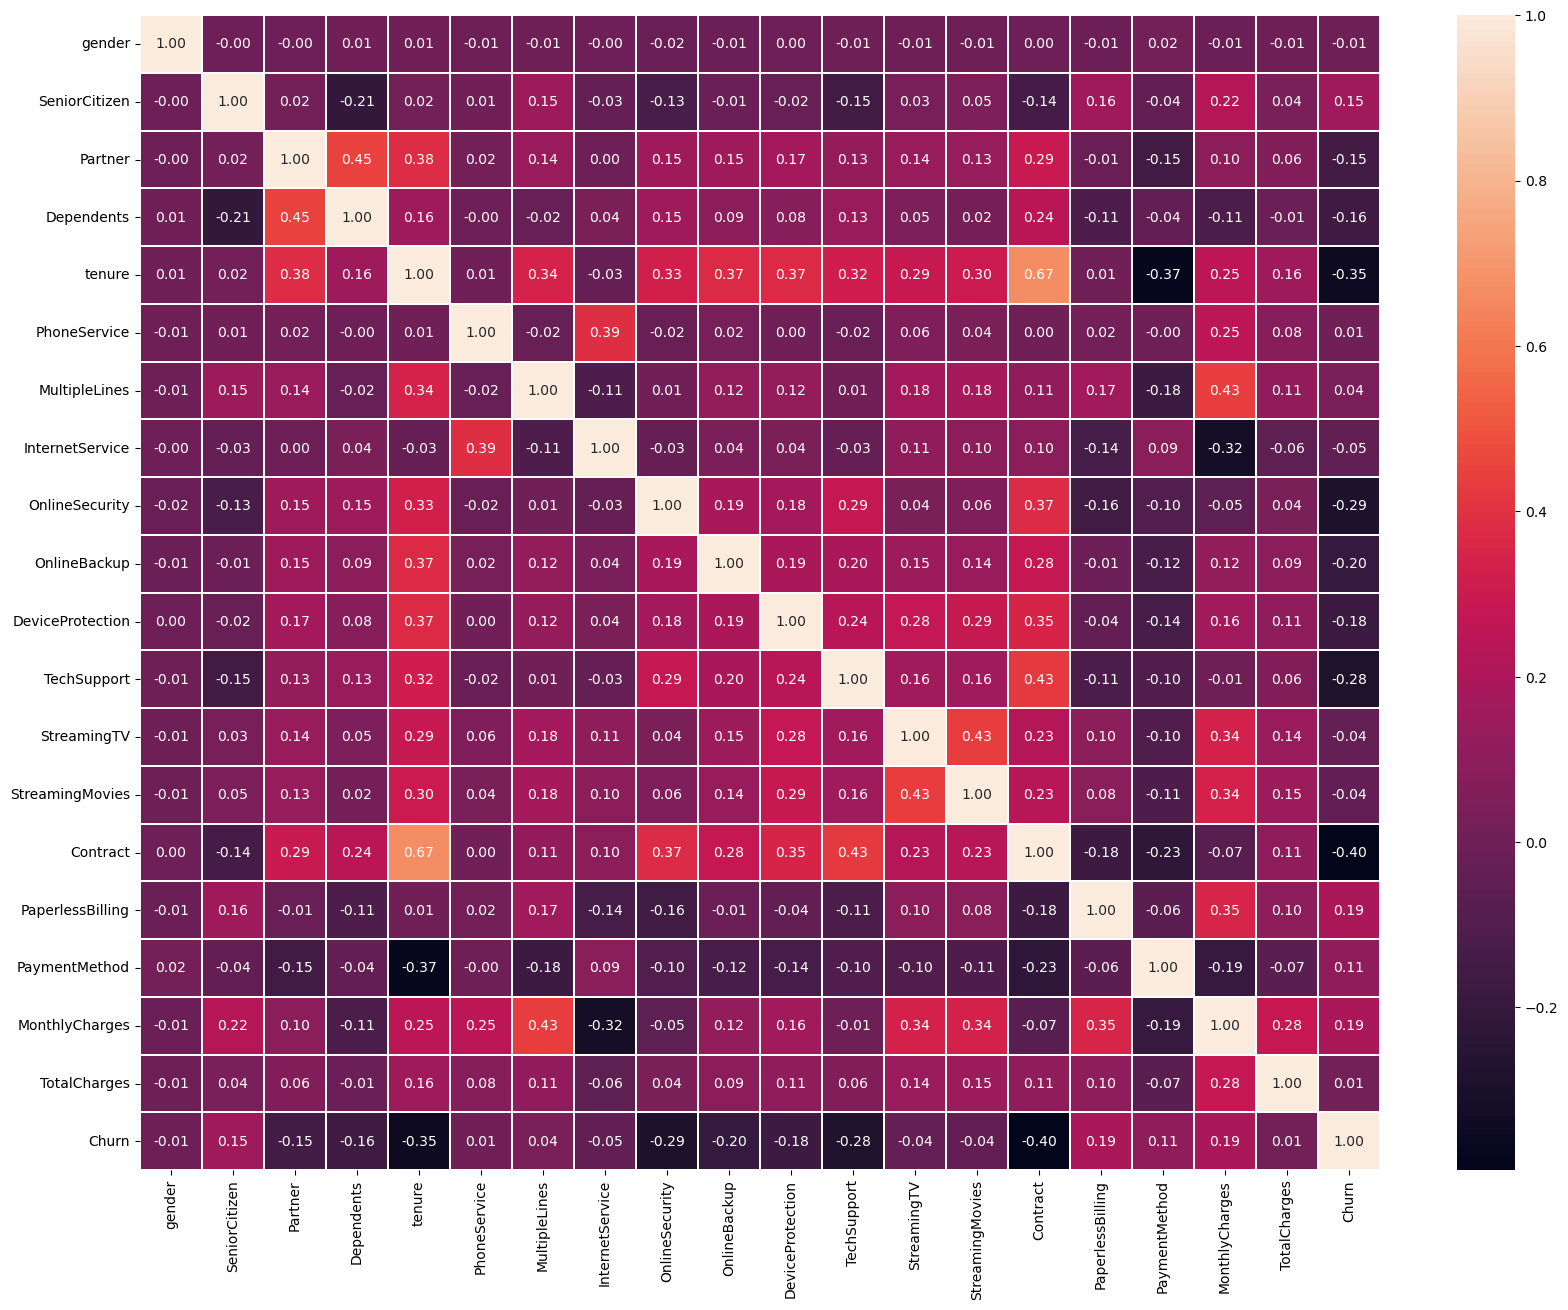

In [197]:
# visualize the correlation
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1,fmt='0.2f',annot=True)

Observation:
1. partner is positively corelated with dependant and tenure
2. tenure is positively corelated with contract and negatively corelated with payment method and churn
3. phone service is positively corelated with internet service
4. multiple lines is positively corelated with monthly charges
5. contract is negatively corelated with churn.

In [198]:
# correlation of column with target column
df.corr()["Churn"].sort_values()

Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
gender             -0.008612
PhoneService        0.011942
TotalCharges        0.014479
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

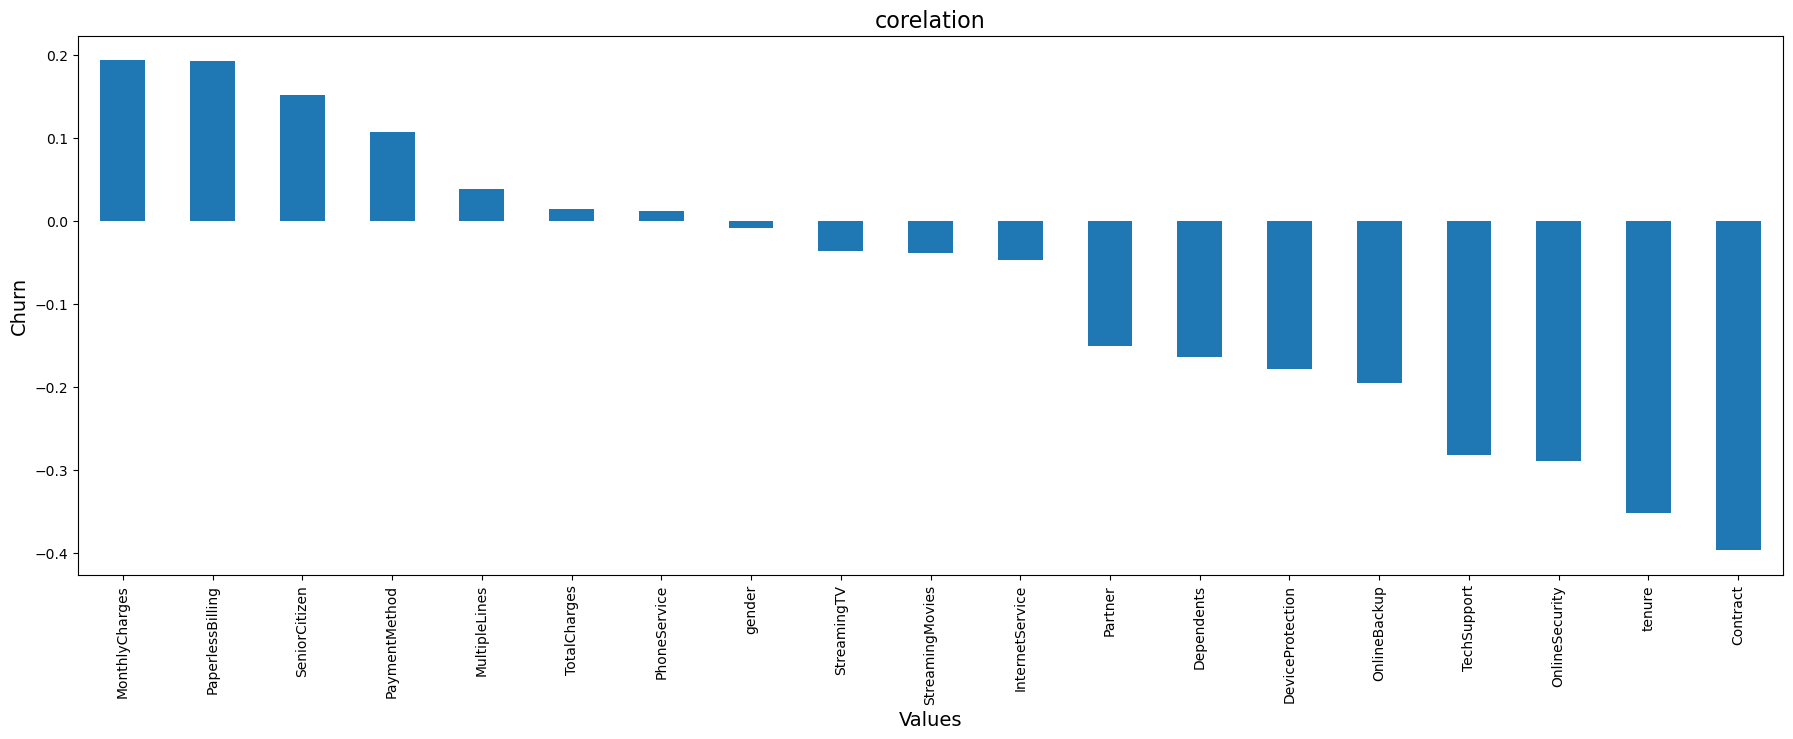

In [199]:
plt.figure(figsize=(22,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar')
plt.xlabel('Values',fontsize=14)
plt.ylabel('Churn',fontsize=14)
plt.title('corelation',fontsize=16)
plt.show()

churn is
1. positively corelated with:- monthly charges, paperlessbilling, senior citizen, payment method, multiple line, total charges, phone services
2. negatively corelated with:- gender, streaming TV, streaming movies, internet service, parter, dependants, deviceprotection, online backup, techsupport, onlinesecurity, tenure and contract

In [200]:
# skewness
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

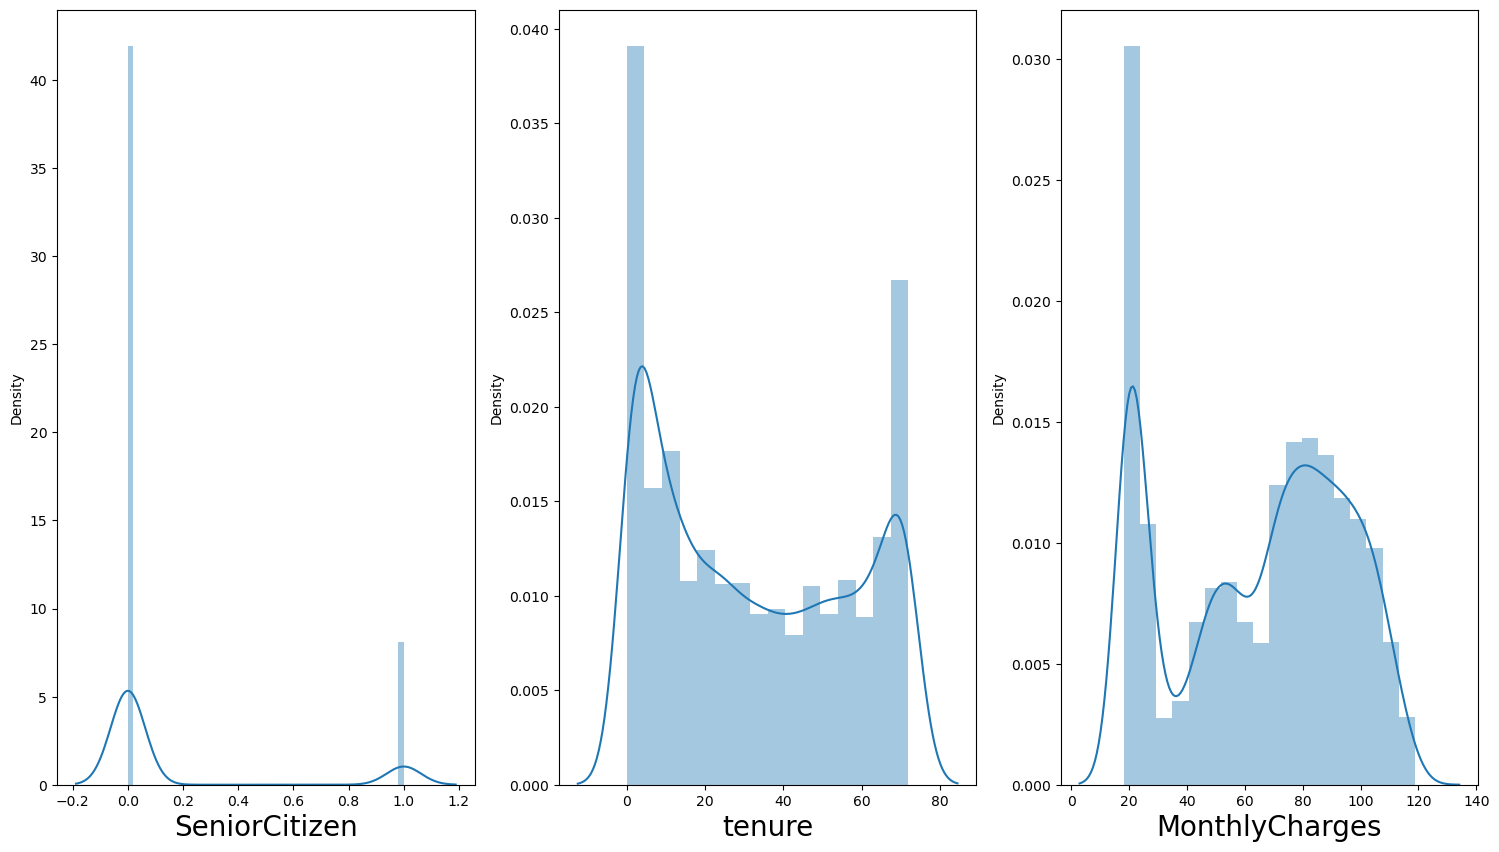

In [201]:
#Checking the Distribution on the DataSet on numerical column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

skeweness is present in all three column

In [13]:
#skewness removing using power tranform
from sklearn.preprocessing import power_transform

df[['SeniorCitizen','MonthlyCharges','tenure']]=power_transform(df[['SeniorCitizen','MonthlyCharges','tenure']])

In [14]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure             -0.243325
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.259035
TotalCharges        0.015857
Churn               1.063031
dtype: float64

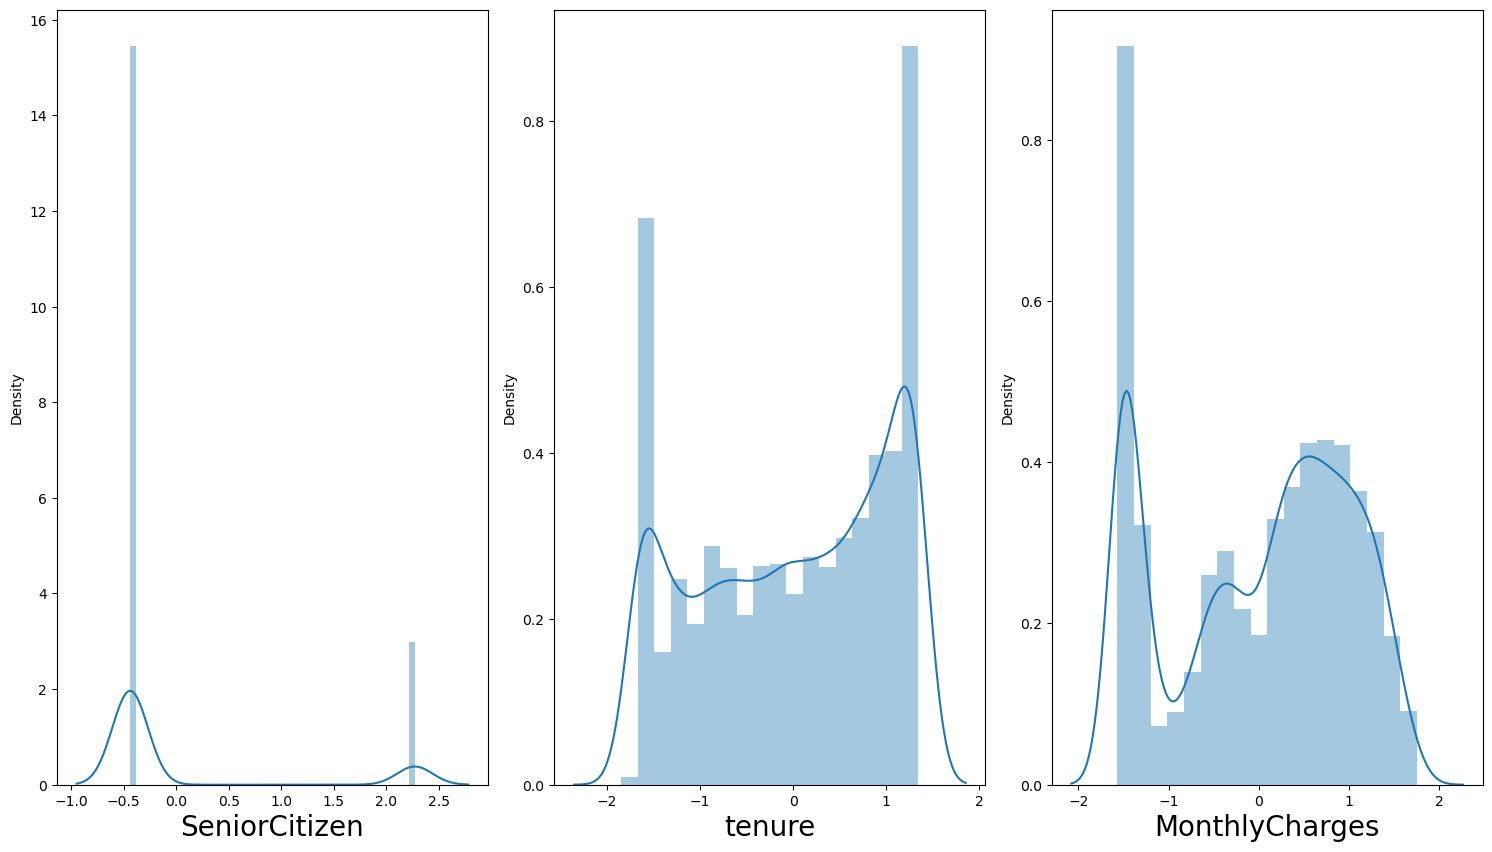

In [15]:
#Checking the Distribution on the DataSet on numerical column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

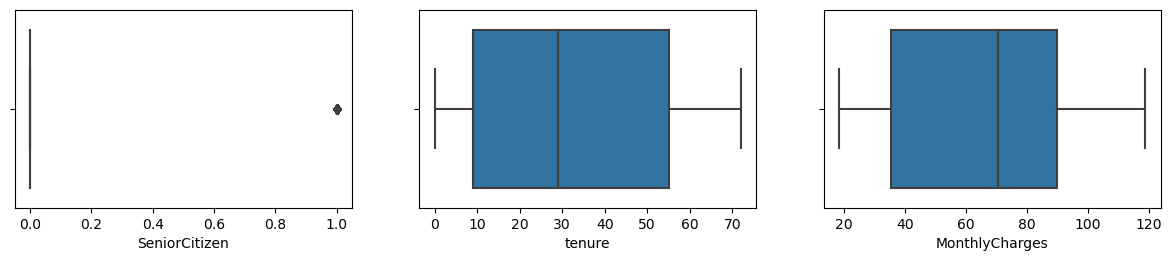

In [202]:
# checking for outliers

numerical_col=df[numerical_col]
plt.figure(figsize=(20,18))
for i, column in enumerate(numerical_col, 1):
    plt.subplot(6,4,i)
    sns.boxplot(df[column])

Outlier is present in senior citizen column

## scaling

In [16]:
x=df.iloc[:,:-1]

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.644343,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.158541,-0.398608
1,0.990532,-0.439916,-0.966622,-0.654012,0.297205,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.239492,-0.948762
2,0.990532,-0.439916,-0.966622,-0.654012,-1.495444,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.342665,-1.641883
3,0.990532,-0.439916,-0.966622,-0.654012,0.646327,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.731079,-0.983710
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.495444,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.213545,-1.235224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.078084,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.671510,-0.879397
7039,-1.009559,-0.439916,1.034530,1.529024,1.342198,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.260981,1.292099
7040,-1.009559,-0.439916,1.034530,1.529024,-0.725121,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.167241,-0.139680
7041,0.990532,2.273159,1.034530,-0.654012,-1.265130,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.334312,-0.316534


### oversampling data using SMOTE

In [18]:
y = df["Churn"]

In [19]:
# oversampling data
from imblearn.over_sampling import SMOTE
smt=SMOTE()

In [20]:
x,y=smt.fit_resample(x,y)

In [21]:
y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

### Checking VIF Values

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.004501,gender
1,1.154840,SeniorCitizen
2,1.511837,Partner
3,1.427336,Dependents
4,2.816696,tenure
5,1.787882,PhoneService
6,1.435901,MultipleLines
7,1.790077,InternetService
8,1.346313,OnlineSecurity
9,1.227546,OnlineBackup


Observation: Vif value for all columns are below 10.0 that means multicolliarity was not present.

### Model Building

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [27]:
#finding best random state
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8207729468599034  on Random_state  2


In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state =2)

### Logistic Regression

In [29]:
#cross validation score for logistic regresson
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)
lss=accuracy_score(y_test,LR_predicted)
for j in range(2,10):
    lssscore=cross_val_score(logreg,x,y,cv=j)
    lsc=lssscore.mean()
    print("At CV:",j)
    print("Cross validation score is:",lsc*100)
    print("Accuracy score is:",lss*100)

At CV: 2
Cross validation score is: 77.1356783919598
Accuracy score is: 78.1159420289855
At CV: 3
Cross validation score is: 77.16476245302496
Accuracy score is: 78.1159420289855
At CV: 4
Cross validation score is: 77.37727097023578
Accuracy score is: 78.1159420289855
At CV: 5
Cross validation score is: 77.27117816957478
Accuracy score is: 78.1159420289855
At CV: 6
Cross validation score is: 77.34848739589988
Accuracy score is: 78.1159420289855
At CV: 7
Cross validation score is: 77.30978070851317
Accuracy score is: 78.1159420289855
At CV: 8
Cross validation score is: 77.3194982852621
Accuracy score is: 78.1159420289855
At CV: 9
Cross validation score is: 77.39687945409366
Accuracy score is: 78.1159420289855


CV=9 selected

In [34]:
logreg_score=cross_val_score(logreg,x_train,y_train,cv=9,scoring='accuracy')

LR_predicted=logreg.predict(x_test)

print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))
print("accuracy",accuracy_score(y_test,LR_predicted))
print("cross validation score:",np.mean(logreg_score))

[[769 271]
 [182 848]]
              precision    recall  f1-score   support

           0       0.81      0.74      0.77      1040
           1       0.76      0.82      0.79      1030

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070

Training accuracy:: 0.7731336071514858
Test accuracy:: 0.7811594202898551
accuracy 0.7811594202898551
cross validation score: 0.7716814380259996


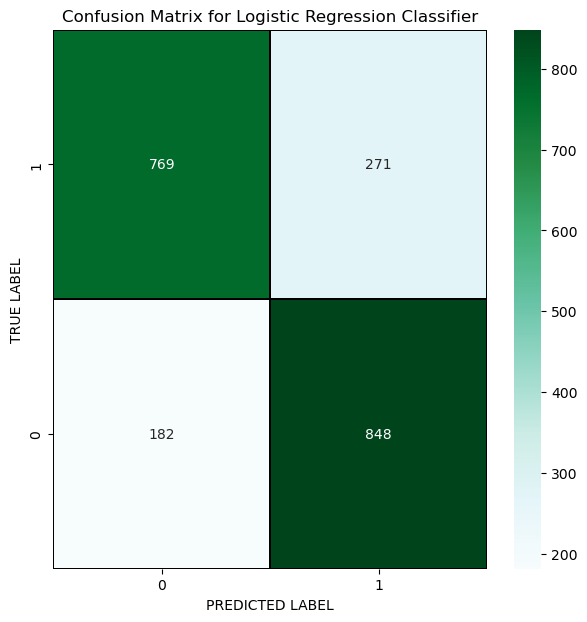

In [35]:
# Lets plot confusion matrix for Logistic Regression
cm = confusion_matrix(y_test,LR_predicted)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

### decision tree classifier

In [59]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x,y,cv=9,scoring='accuracy')

dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)

print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))
print("cross validation score :",np.mean(dtc_score))
print("accuracy",accuracy_score(y_test,predicted_dtc))

[[849 191]
 [184 846]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1040
           1       0.82      0.82      0.82      1030

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070

Training accuracy:: 0.9983087702343562
Test accuracy:: 0.8188405797101449
cross validation score : 0.7938841168333732
accuracy 0.8188405797101449


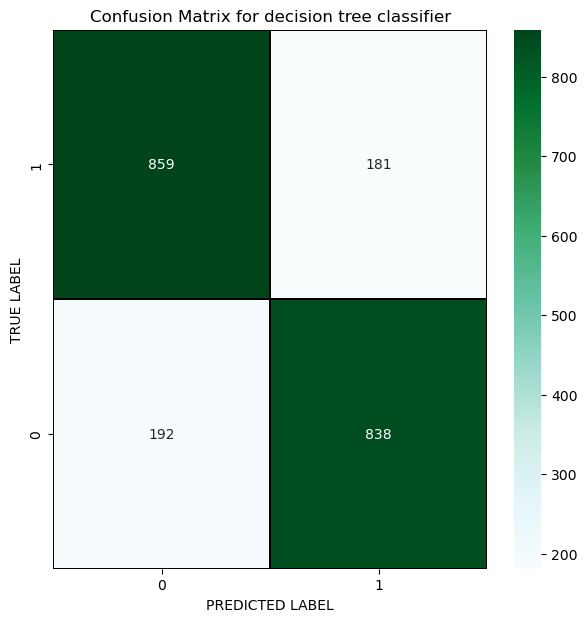

In [37]:
# Lets plot confusion matrix for decision tree classifier
cm = confusion_matrix(y_test,predicted_dtc)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for decision tree classifier')
plt.show()

### KNeighborsClassifier

In [38]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x,y,cv=9,scoring='accuracy')

knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)

print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))
print("cross validation score for knn:",np.mean(knn_score))
print("accuracy",accuracy_score(y_test,predicted_knn))

[[678 362]
 [ 71 959]]
              precision    recall  f1-score   support

           0       0.91      0.65      0.76      1040
           1       0.73      0.93      0.82      1030

    accuracy                           0.79      2070
   macro avg       0.82      0.79      0.79      2070
weighted avg       0.82      0.79      0.79      2070

Training accuracy:: 0.8537086252718048
Test accuracy:: 0.7908212560386474
cross validation score for knn: 0.7910745323595818
accuracy 0.7908212560386474


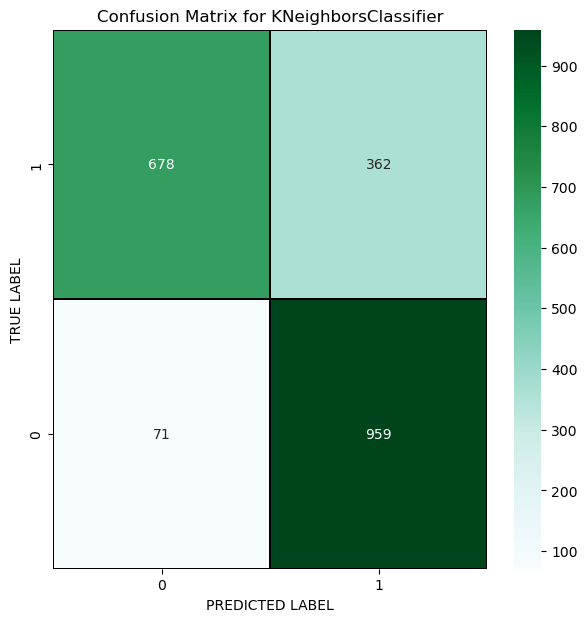

In [39]:
# Lets plot confusion matrix for KNeighborsClassifier
cm = confusion_matrix(y_test,predicted_knn)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNeighborsClassifier')
plt.show()

### Naive baised classifier

In [60]:
gs=GaussianNB()
gs_score=cross_val_score(gs,x,y,cv=9,scoring='accuracy')

gs.fit(x_train,y_train)
predicted_gs=gs.predict(x_test)

print(confusion_matrix(y_test,predicted_gs))
print(classification_report(y_test,predicted_gs))
print("Training accuracy::",gs.score(x_train,y_train))
print("Test accuracy::",gs.score(x_test,y_test))
print("cross validation score :",np.mean(gs_score))
print("accuracy",accuracy_score(y_test,predicted_gs))

[[759 281]
 [179 851]]
              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1040
           1       0.75      0.83      0.79      1030

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070

Training accuracy:: 0.7597245711524523
Test accuracy:: 0.7777777777777778
cross validation score : 0.7636272667263699
accuracy 0.7777777777777778


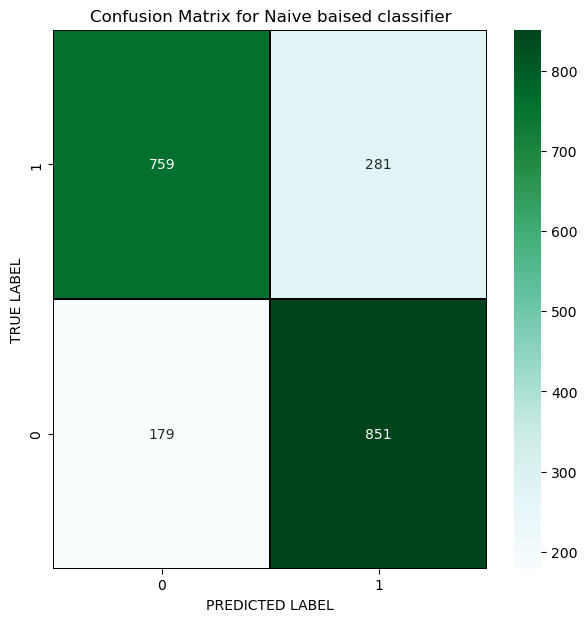

In [42]:
# Lets plot confusion matrix for Naive baised classifier
cm = confusion_matrix(y_test,predicted_gs)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Naive baised classifier')
plt.show()

### Ensemble method

### RandomForestClassifier

In [62]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x,y,cv=9,scoring='accuracy')

rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)

print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))
print("cross validation score ",np.mean(rfc_score))
print("accuracy",accuracy_score(y_test,predicted_rfc))

[[885 155]
 [131 899]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1040
           1       0.85      0.87      0.86      1030

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070

Training accuracy:: 0.9983087702343562
Test accuracy:: 0.8618357487922705
cross validation score  0.8606606879327959
accuracy 0.8618357487922705


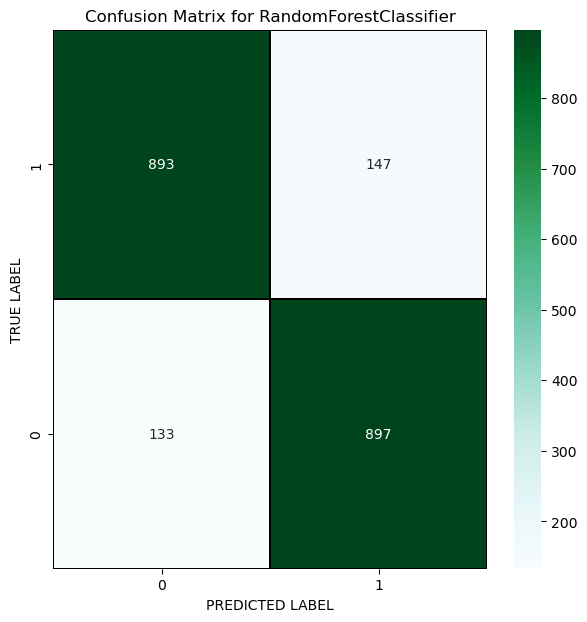

In [44]:
# Lets plot confusion matrix 
cm = confusion_matrix(y_test,predicted_rfc)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

### ADA BOOST CLASSIFIER

In [45]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x,y,cv=9,scoring='accuracy')

adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)

print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))
print("cross validation score for Ada boost:",np.mean(adb_score))
print("accuracy",accuracy_score(y_test,predicted_adb))

[[814 226]
 [136 894]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1040
           1       0.80      0.87      0.83      1030

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.82      2070
weighted avg       0.83      0.83      0.82      2070

Training accuracy:: 0.820367238463397
Test accuracy:: 0.8251207729468599
cross validation score for Ada boost: 0.8112737138761054
accuracy 0.8251207729468599


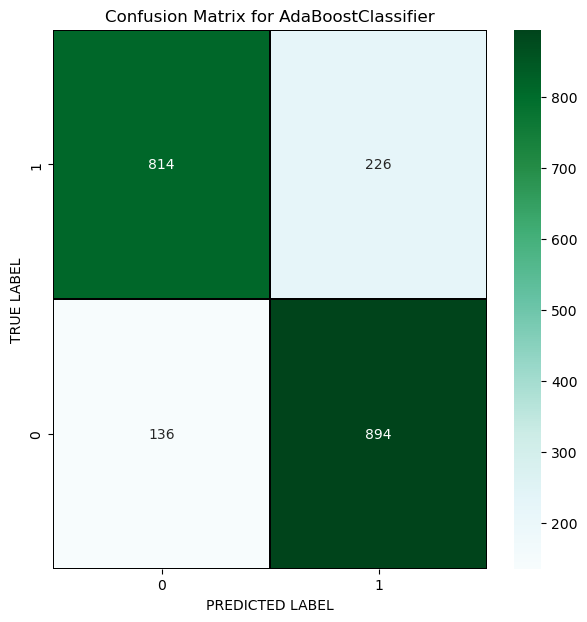

In [46]:
# Lets plot confusion matrix 
cm = confusion_matrix(y_test,predicted_adb)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for AdaBoostClassifier')
plt.show()

### Gradient Boosting classifier

In [49]:
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x,y,cv=9,scoring='accuracy')

grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)

print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))
print("accuracy",accuracy_score(y_test,predicted_grbc))

[[847 193]
 [122 908]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1040
           1       0.82      0.88      0.85      1030

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070

Training accuracy:: 0.8525006040106305
Test accuracy:: 0.8478260869565217
cross validation score for Gradient Boosting Classifier: 0.8378530375079359
accuracy 0.8478260869565217


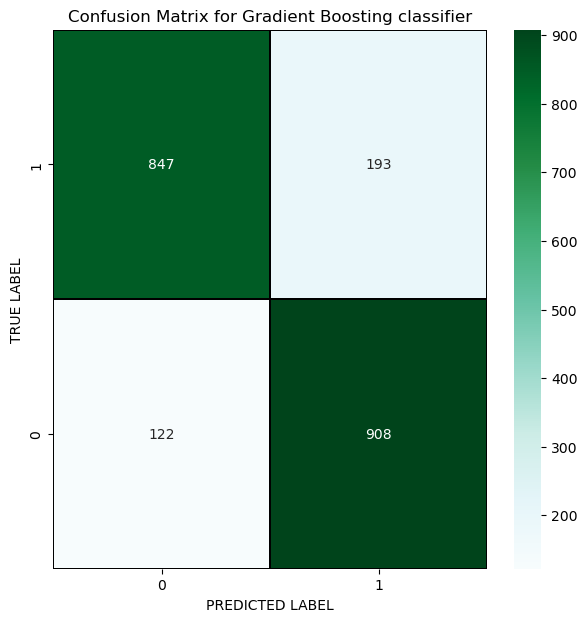

In [50]:
# Lets plot confusion matrix 
cm = confusion_matrix(y_test,predicted_grbc)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting classifier')
plt.show()

### BAGGING CLASSIFIER

In [55]:
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x,y,cv=9,scoring='accuracy')
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))
print("cross validation score for BAGGING Classifier:",np.mean(bgc_score))

0.8531400966183574
[[908 132]
 [172 858]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1040
           1       0.87      0.83      0.85      1030

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070

Training accuracy:: 0.9890070065233149
Test accuracy:: 0.8531400966183574
cross validation score for BAGGING Classifier: 0.8379520944488591


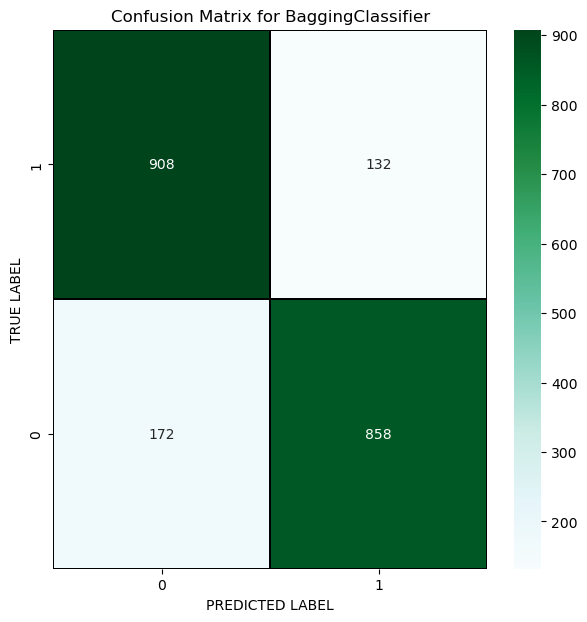

In [56]:
# Lets plot confusion matrix 
cm = confusion_matrix(y_test,predicted_bgc)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for BaggingClassifier')
plt.show()

### Extra Trees Classifier

In [63]:
xtc = ExtraTreesClassifier()
xtc_score=cross_val_score(xtc,x,y,cv=9,scoring='accuracy')
xtc.fit(x_train,y_train)
predicted_xtc=xtc.predict(x_test)
print(accuracy_score(y_test,predicted_xtc))
print(confusion_matrix(y_test,predicted_xtc))
print(classification_report(y_test,predicted_xtc))
print("Training accuracy::",xtc.score(x_train,y_train))
print("Test accuracy::",xtc.score(x_test,y_test))
print("cross validation score for Extra Trees Classifier:",np.mean(xtc_score))

0.8777777777777778
[[891 149]
 [104 926]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1040
           1       0.86      0.90      0.88      1030

    accuracy                           0.88      2070
   macro avg       0.88      0.88      0.88      2070
weighted avg       0.88      0.88      0.88      2070

Training accuracy:: 0.9983087702343562
Test accuracy:: 0.8777777777777778
cross validation score for Extra Trees Classifier: 0.8744777857662407


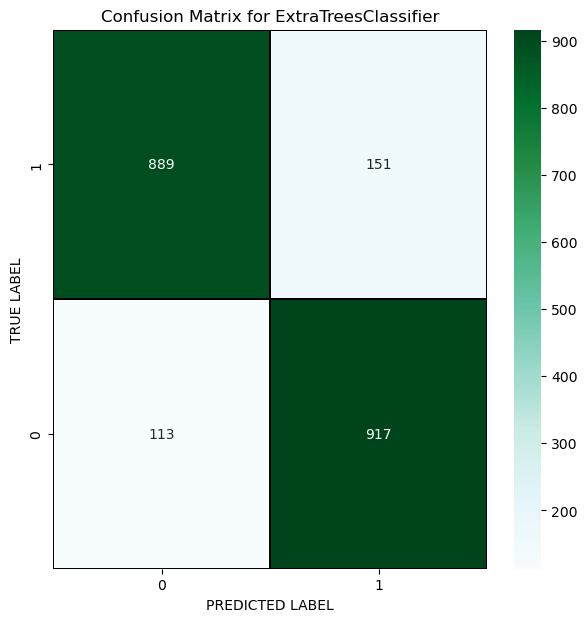

In [58]:
# Lets plot confusion matrix 
cm = confusion_matrix(y_test,predicted_xtc)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for ExtraTreesClassifier')
plt.show()

In [64]:
print("Logistic regression")
print("accuracy",accuracy_score(y_test,LR_predicted))
print("cross validation score:",np.mean(logreg_score))

print("Decision tree classifier")
print("cross validation score :",np.mean(dtc_score))
print("accuracy",accuracy_score(y_test,predicted_dtc))

print("KNeighborsClassifier")
print("cross validation score for knn:",np.mean(knn_score))
print("accuracy",accuracy_score(y_test,predicted_knn))

print("Naive baised classifier")
print("cross validation score :",np.mean(gs_score))
print("accuracy",accuracy_score(y_test,predicted_gs))


print("RandomForestClassifier")
print("cross validation score for ",np.mean(rfc_score))
print("accuracy",accuracy_score(y_test,predicted_rfc))


print("Ada boost Classifier")
print("cross validation score for Ada boost:",np.mean(adb_score))
print("accuracy",accuracy_score(y_test,predicted_adb))


print("Gradient Boosting Classifier")
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))
print("accuracy",accuracy_score(y_test,predicted_grbc))


print("BAGGING Classifier")
print("Test accuracy::",bgc.score(x_test,y_test))
print("cross validation score for BAGGING Classifier:",np.mean(bgc_score))

print("Extra Trees Classifier")
print("Test accuracy::",xtc.score(x_test,y_test))
print("cross validation score for Extra Trees Classifier:",np.mean(xtc_score))


Logistic regression
accuracy 0.7811594202898551
cross validation score: 0.7716814380259996
Decision tree classifier
cross validation score : 0.7938841168333732
accuracy 0.8188405797101449
KNeighborsClassifier
cross validation score for knn: 0.7910745323595818
accuracy 0.7908212560386474
Naive baised classifier
cross validation score : 0.7636272667263699
accuracy 0.7777777777777778
RandomForestClassifier
cross validation score for  0.8606606879327959
accuracy 0.8618357487922705
Ada boost Classifier
cross validation score for Ada boost: 0.8112737138761054
accuracy 0.8251207729468599
Gradient Boosting Classifier
cross validation score for Gradient Boosting Classifier: 0.8378530375079359
accuracy 0.8478260869565217
BAGGING Classifier
Test accuracy:: 0.8531400966183574
cross validation score for BAGGING Classifier: 0.8379520944488591
Extra Trees Classifier
Test accuracy:: 0.8777777777777778
cross validation score for Extra Trees Classifier: 0.8744777857662407


Observation :
    from above i got high accuracy using Extra tree clasifier and from cross validation score and accuracy score Extra tree classifier selected

### Hyper parameter tuning

In [65]:
# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(xtc, param_grid=param_grid, cv=9)
grid_search.fit(x, y)

# Print the best hyperparameters found
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}


In [68]:
final = ExtraTreesClassifier(max_depth=None, min_samples_split=2, n_estimators=300)


In [70]:
final.fit(x_train, y_train)
pred = final.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

88.16425120772948


got accuracy of 88.164% after hyper parameter tuning

### roc auc curve

In [71]:
from sklearn.metrics import roc_auc_score

In [72]:
print("roc auc score::",roc_auc_score(y_test, pred))

roc auc score:: 0.8817214339059


In [73]:
from sklearn.metrics import roc_curve

In [74]:
fpr1, tpr1, thresh1 = roc_curve(y_test,pred, pos_label=1)

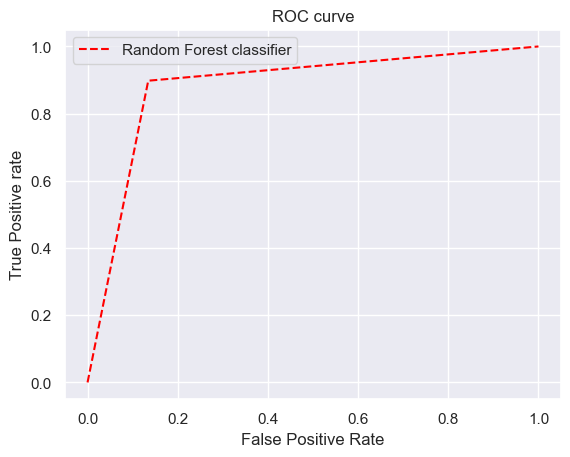

In [75]:
#plotting ROC CURVE
sns.set_theme(style="darkgrid")
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='Random Forest classifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

### Saving model

In [76]:
#importing library
import joblib
#saving the model
joblib.dump(xtc,'telecom_customer_churn.pkl')

['telecom_customer_churn.pkl']

### prediction

In [77]:
# Loading the saved model
model=joblib.load('telecom_customer_churn.pkl')
#Prediction
prediction = model.predict(x_test)
prediction

array([0, 0, 1, ..., 1, 0, 1])

In [78]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,0,0
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
2065,1,1
2066,0,1
2067,1,1
2068,0,0


Here we find predicted and original value is almost same.